In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
train1 = pd.read_excel('data/train_first_part.xlsx')
train2 = pd.read_json('data/train_second_part.json')
weather = pd.read_csv('data/weather.csv')

# 1.1 Подготовка обучающей выборки

In [5]:
train = pd.concat([train1, train2])
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
8582,id0002921,1,4/6/16 14:16,4/6/16 14:20,1,-73.973015,40.760948,-73.976387,40.755604,N,207
8583,id1329189,2,3/24/16 1:26,3/24/16 1:38,1,-73.985550,40.727257,-73.957039,40.712387,N,740
8584,id0408460,1,2/23/16 16:38,2/23/16 16:48,1,-73.972038,40.750202,-73.998360,40.733360,N,605
8585,id0147762,1,5/24/16 7:20,5/24/16 7:25,1,-73.993332,40.724342,-74.004250,40.707470,N,287


<AxesSubplot:>

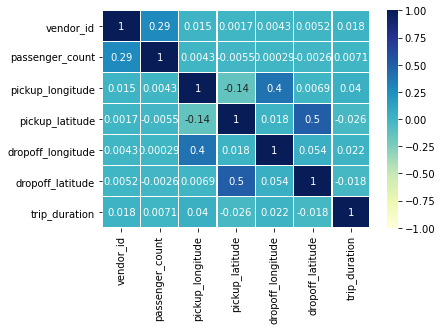

In [6]:
sns.heatmap(train.corr(), linewidths=.5, annot=True, cmap="YlGnBu",vmin = -1)

Корреляция нигде не превышает недопустимых значений

In [7]:
train.drop("id", axis = 1, inplace = True)

# 1.2 Форматирование - приведение данных к приемлемому формату

In [8]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048609 entries, 0 to 8586
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1048609 non-null  int64  
 1   pickup_datetime     1048609 non-null  object 
 2   dropoff_datetime    1048609 non-null  object 
 3   passenger_count     1048609 non-null  int64  
 4   pickup_longitude    1048609 non-null  float64
 5   pickup_latitude     1048609 non-null  float64
 6   dropoff_longitude   1048609 non-null  float64
 7   dropoff_latitude    1048609 non-null  float64
 8   store_and_fwd_flag  1048609 non-null  object 
 9   trip_duration       1048609 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 88.0+ MB


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 366 non-null    object 
 1   maximum temperature  366 non-null    int64  
 2   minimum temperature  366 non-null    int64  
 3   average temperature  366 non-null    float64
 4   precipitation        366 non-null    object 
 5   snow fall            366 non-null    object 
 6   snow depth           366 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [10]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
train["dropoff_datetime"] = pd.to_datetime(train["dropoff_datetime"])
train.info()
print('\n')
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048609 entries, 0 to 8586
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1048609 non-null  int64         
 1   pickup_datetime     1048609 non-null  datetime64[ns]
 2   dropoff_datetime    1048609 non-null  datetime64[ns]
 3   passenger_count     1048609 non-null  int64         
 4   pickup_longitude    1048609 non-null  float64       
 5   pickup_latitude     1048609 non-null  float64       
 6   dropoff_longitude   1048609 non-null  float64       
 7   dropoff_latitude    1048609 non-null  float64       
 8   store_and_fwd_flag  1048609 non-null  object        
 9   trip_duration       1048609 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 88.0+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   C

In [11]:
train['store_and_fwd_flag'].value_counts()

N    1042800
Y       5809
Name: store_and_fwd_flag, dtype: int64

In [12]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].apply(lambda x: '0' if (x == 'N' or x == 0) else '1')
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].astype(int)

In [13]:
train[(train['store_and_fwd_flag'] == 0)].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [14]:
weather[['precipitation','snow fall','snow depth']].value_counts()

precipitation  snow fall  snow depth
0              0          0             115
0.00           0.0        0              98
T              0.0        0              10
               0          0              10
0.04           0.0        0               4
                                       ... 
0.01           0.2        0               1
0.23           0          0               1
0.22           0.0        0               1
0.20           0.0        0               1
T              T          T               1
Length: 103, dtype: int64

In [15]:
weather.loc[weather['precipitation'] == 'T', 'precipitation'] = 0
weather.loc[weather['snow fall'] == 'T', 'snow fall'] = 0
w = weather[(weather['snow depth']!='T')]
w['snow depth'] = w['snow depth'].astype(float)
weather.loc[weather['snow depth'] == 'T', 'snow depth'] = w['snow depth'].mean()

weather[['precipitation','snow fall','snow depth']] = weather[['precipitation','snow fall','snow depth']].astype(float)
weather['date'] = pd.to_datetime(weather['date'])
weather

<ipython-input-15-506a93f87c8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w['snow depth'] = w['snow depth'].astype(float)


,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.00,0.0,0.0
1,2016-02-01,40,32,36.0,0.00,0.0,0.0
2,2016-03-01,45,35,40.0,0.00,0.0,0.0
3,2016-04-01,36,14,25.0,0.00,0.0,0.0
4,2016-05-01,29,11,20.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...
361,2016-12-27,60,40,50.0,0.00,0.0,0.0
362,2016-12-28,40,34,37.0,0.00,0.0,0.0
363,2016-12-29,46,33,39.5,0.39,0.0,0.0
364,2016-12-30,40,33,36.5,0.01,0.0,0.0


In [16]:
weather[(weather['precipitation']!=0)].head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
9,2016-10-01,59,40,49.5,1.80,0.0,0.0
15,2016-01-16,52,42,47.0,0.24,0.0,0.0
16,2016-01-17,42,30,36.0,0.05,0.4,0.0
21,2016-01-22,30,21,25.5,0.01,0.2,0.0
22,2016-01-23,27,24,25.5,2.31,27.3,6.0


In [17]:
train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1048609.00,1048609.00,1048609.00,1048609.00,1048609.00,1048609.00,1048609.00,1048609.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01,962.15
std,0.50,1.31,0.04,0.03,0.04,0.04,0.07,5852.91
min,1.00,0.00,-78.55,34.36,-79.82,32.18,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.91,1.00,3526282.00


<AxesSubplot:>

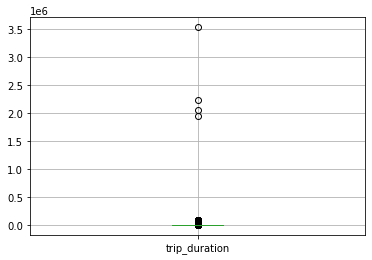

In [18]:
train.boxplot(column = ['trip_duration'])

<AxesSubplot:>

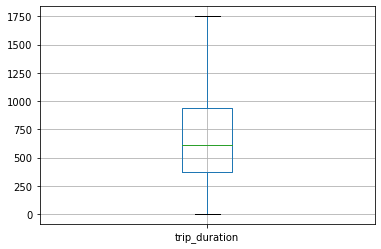

In [49]:
# train.loc[(train['trip_duration'] > train['trip_duration'].std()*3 + train['trip_duration'].mean()) | (train['trip_duration'] < train['trip_duration'].mean() - train['trip_duration'].std()*3), 'trip_duration'] = 0
# train = train[(train['trip_duration']>0)]

# q25, q75 = np.percentile(df['trip_duration'],25),np.percentile(df['trip_duration'],75)
# iqr = q75 - q25
# cut_off = iqr * 3
# lower,upper = q25 - cut_off, q75 + cut_off
# print(lower,upper)

q = df['trip_duration'].quantile(0.93)
ty = df[df['trip_duration']<q]
ty.boxplot(column = ['trip_duration'])

<AxesSubplot:>

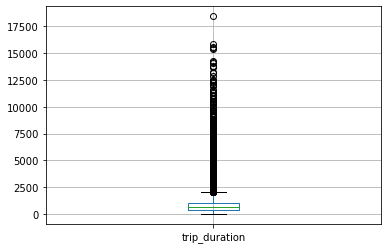

In [20]:
train.boxplot(column = ['trip_duration'])

In [21]:
train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1047120.00,1047120.00,1047120.00,1047120.00,1047120.00,1047120.00,1047120.00,1047120.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01,836.96
std,0.50,1.31,0.04,0.03,0.04,0.04,0.07,661.76
min,1.00,0.00,-78.55,34.36,-79.82,32.18,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,661.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1073.00
max,2.00,9.00,-61.34,51.88,-61.34,43.91,1.00,18439.00


In [22]:
train['date'] = train['pickup_datetime'].dt.date
train

<ipython-input-22-f3b6f1ec78df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['pickup_datetime'].dt.date


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...
8582,1,2016-04-06 14:16:00,2016-04-06 14:20:00,1,-73.973015,40.760948,-73.976387,40.755604,0,207,2016-04-06
8583,2,2016-03-24 01:26:00,2016-03-24 01:38:00,1,-73.985550,40.727257,-73.957039,40.712387,0,740,2016-03-24
8584,1,2016-02-23 16:38:00,2016-02-23 16:48:00,1,-73.972038,40.750202,-73.998360,40.733360,0,605,2016-02-23
8585,1,2016-05-24 07:20:00,2016-05-24 07:25:00,1,-73.993332,40.724342,-74.004250,40.707470,0,287,2016-05-24


In [23]:
train['date'] = pd.to_datetime(train['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047120 entries, 0 to 8586
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1047120 non-null  int64         
 1   pickup_datetime     1047120 non-null  datetime64[ns]
 2   dropoff_datetime    1047120 non-null  datetime64[ns]
 3   passenger_count     1047120 non-null  int64         
 4   pickup_longitude    1047120 non-null  float64       
 5   pickup_latitude     1047120 non-null  float64       
 6   dropoff_longitude   1047120 non-null  float64       
 7   dropoff_latitude    1047120 non-null  float64       
 8   store_and_fwd_flag  1047120 non-null  int32         
 9   trip_duration       1047120 non-null  int64         
 10  date                1047120 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int32(1), int64(3)
memory usage: 91.9 MB


<ipython-input-23-391a242083d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = pd.to_datetime(train['date'])


In [24]:
df = train.merge(weather, on = 'date', how = 'left')
df.drop('date', axis = 1, inplace = True)

# 2.2 Исследование целевой переменной

C:\Users\borod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

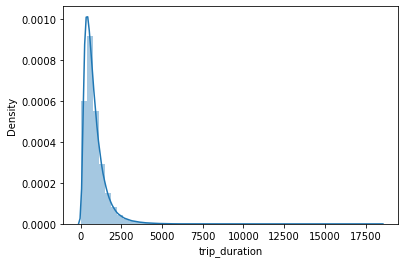

In [25]:
sns.distplot(df['trip_duration'])

In [34]:
q25, q75 = np.percentile(df['trip_duration'],25),np.percentile(df['trip_duration'],75)
iqr = q75 - q25
cut_off = iqr * 3
lower,upper = q25 - cut_off, q75 + cut_off
print(lower,upper)

-1631.0 3101.0


In [38]:
df = df[(df['trip_duration']>lower)]

In [39]:
df = df[(df['trip_duration']<upper)]

C:\Users\borod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

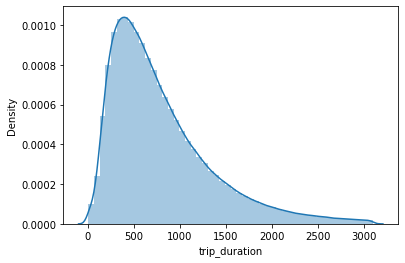

In [40]:
sns.distplot(df['trip_duration'])

# 2.3 Визуальный анализ данных

<AxesSubplot:>

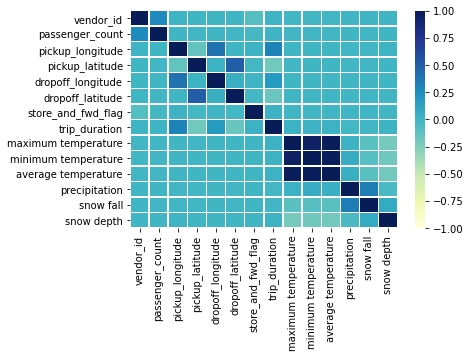

In [208]:
sns.heatmap(df.corr(), linewidths=.5,  cmap="YlGnBu",vmin = -1)

Больше всего на целевую переменную влияет параметр pickup_longitude

<AxesSubplot:>

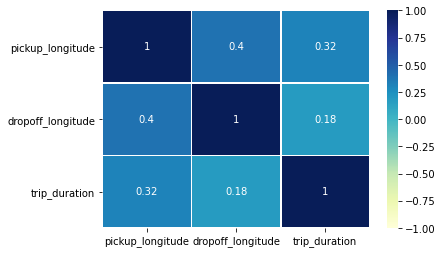

In [210]:
sns.heatmap(df[['pickup_longitude','dropoff_longitude','trip_duration']].corr(), annot = True, linewidths=.5,  cmap="YlGnBu",vmin = -1)